# 1. Know your Data

### Import Libraries

In [1]:
# importing necessary libraries
# Importing numpy and pandas for data processing and data wrangling
import numpy as np
import pandas as pd

# Importing tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Import library for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Libraries used for ML model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
# loading the iris dataset
iris = pd.read_csv("iris.csv")

### Dataset First View

In [3]:
#displaying the first few rows of iris dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Rows and Columns Count

In [4]:
# Dataset rows and columns count
print("Number of rows are: ", iris.shape[0])
print("Number of columns are: ", iris.shape[1])

Number of rows are:  150
Number of columns are:  6


### Dataset Information

In [5]:
# Dataset info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
dup = iris.duplicated().sum()
print("Number of duplicate rows are: ", dup)

Number of duplicate rows are:  0


### Missing values/Null values

In [7]:
# Missing values/Null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Things We learned about the Dataset
- The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for various species, recorded in centimeters.
- The dataset comprises 150 rows and 6 columns.
- It is free of duplicate values and contains no missing (null) values.

# 2. Understanding the Variables

In [8]:
# Dataset columns
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
# Dataset description
iris.describe(include = 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


### Check Unique Values for each variable

In [10]:
# Check Uniques Values for each variable.
for i in iris.columns.tolist():
    print("Number of unique values in", i, "is", iris[i].nunique())

Number of unique values in Id is 150
Number of unique values in SepalLengthCm is 35
Number of unique values in SepalWidthCm is 23
Number of unique values in PetalLengthCm is 43
Number of unique values in PetalWidthCm is 22
Number of unique values in Species is 3


# 3. Data Wrangling

In [11]:
# We don't need the first column so let's drop that
df = iris.iloc[:, 1:]

In [12]:
# New updated Dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Data Visualization, Storytelling and Experimenting with charts: Understand the relationships between variables

### Chart 1: Distribution of Numerical Variables

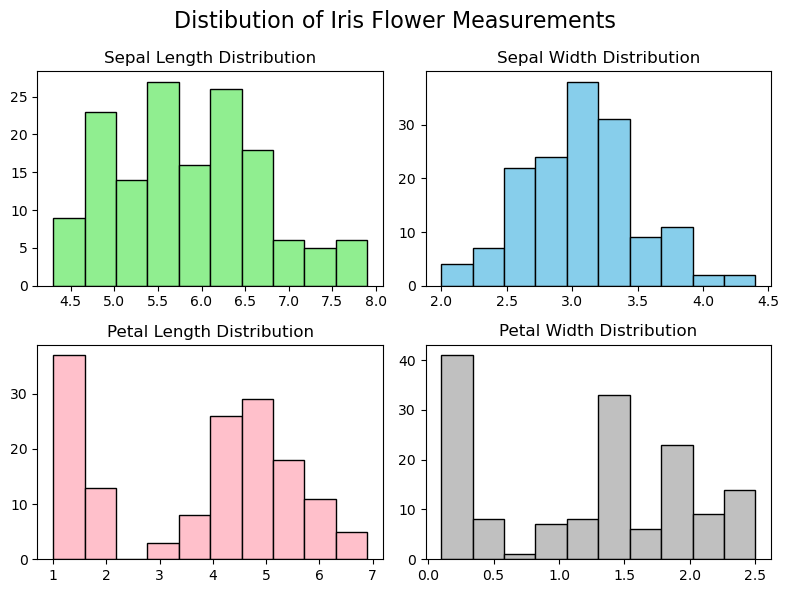

In [13]:
# Chart 1: Histogram Visualization for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize = (8, 6))
plt.suptitle('Distibution of Iris Flower Measurements', fontsize = 16)

# Create a 2x2 grid of subplots
# Subplot 1
plt.subplot(2, 2, 1)
plt.hist(df['SepalLengthCm'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Sepal Length Distribution')

# Subplot 2
plt.subplot(2, 2, 2)
plt.hist(df['SepalWidthCm'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Sepal Width Distribution')

# Subplot 3
plt.subplot(2, 2, 3)
plt.hist(df['PetalLengthCm'], bins = 10, color = 'pink', edgecolor = 'black')
plt.title('Petal Length Distribution')

# Subplot 4
plt.subplot(2, 2, 4)
plt.hist(df['PetalWidthCm'], bins = 10, color = 'silver', edgecolor = 'black')
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()
plt.show()

### Chart 2 - Sepal Length vs Sepal Width

In [14]:
# Let's group the dataframe by the values in 'Species' column
# For each group calculate the mean
iris.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


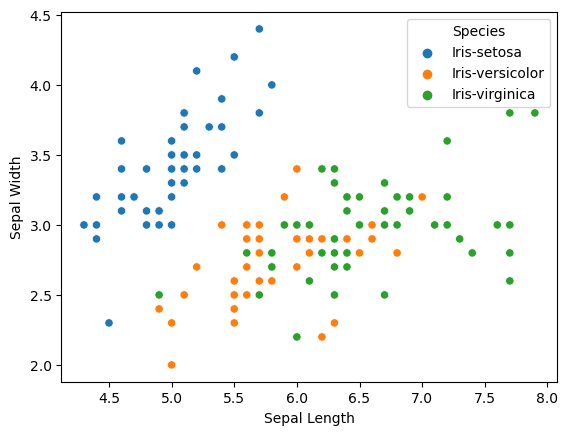

In [15]:
# Chart 2: Scatter plot visualization for Sepal Length vs Sepal Width
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df)

# Set labels for the x and y axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Display the scatter plot
plt.show()

### Chart 3: Petal Length vs Petal Width

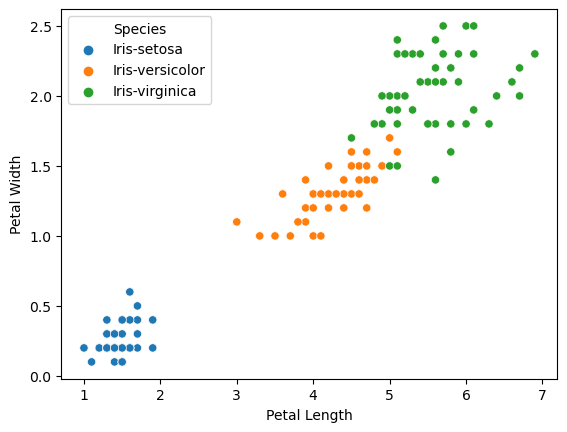

In [16]:
# Chart 3: Scatter plot visualization for Petal Length vs Petal Width
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df)

# Set labels for the x and y axes
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Display the scatter plot
plt.show()

### Chart 4: Sepal Length vs Petal Length

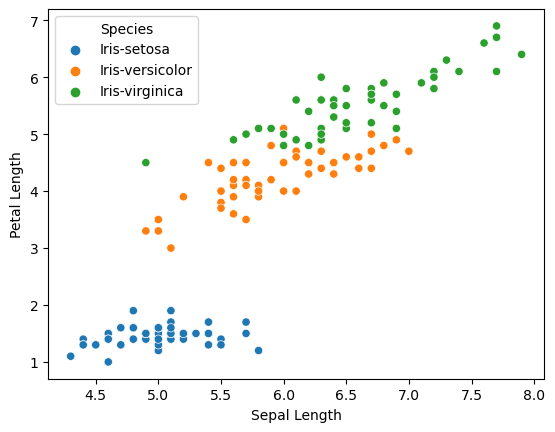

In [17]:
# Chart 3: Scatter plot visualization for Sepal Length vs Petal length
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species', data = df)

# Set labels for the x and y axes
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Display the scatter plot
plt.show()

### Chart 5: Sepal Width vs Petal Width

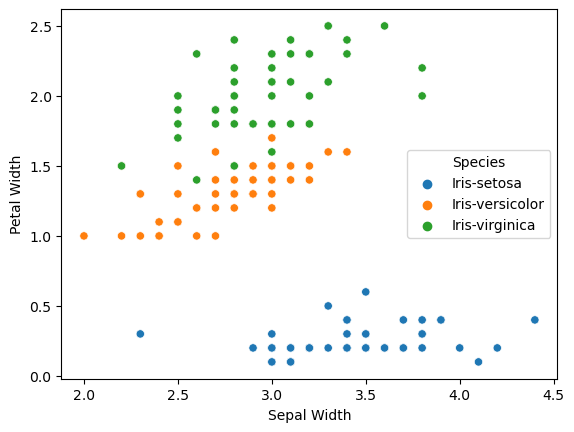

In [18]:
# Chart 4: Scatter plot visualization for Sepal Width vs Petal Width
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalWidthCm', hue = 'Species', data = df)

# Set labels for the x and y axes
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Display the scatter plot
plt.show()

### Chart 6: Correlation Heatmap

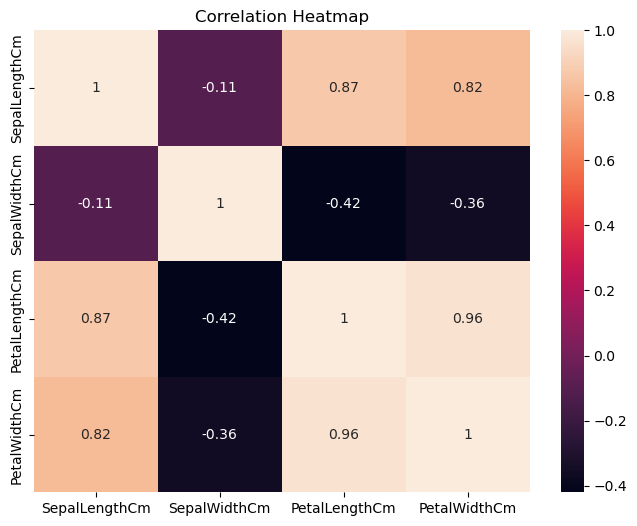

In [19]:
# Chart 6 : Correlation Heatmap 
# Converting the string datatypes into numerical types
numerical_columns = df.select_dtypes(include = ['float64', 'int64'])
corr_matrix = numerical_columns.corr()

# Plot Heatmap
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True)

# Set the title for the correlation heatmap
plt.title('Correlation Heatmap')

# Display the Heatmap
plt.show()

### Chart 7: Pair Plot

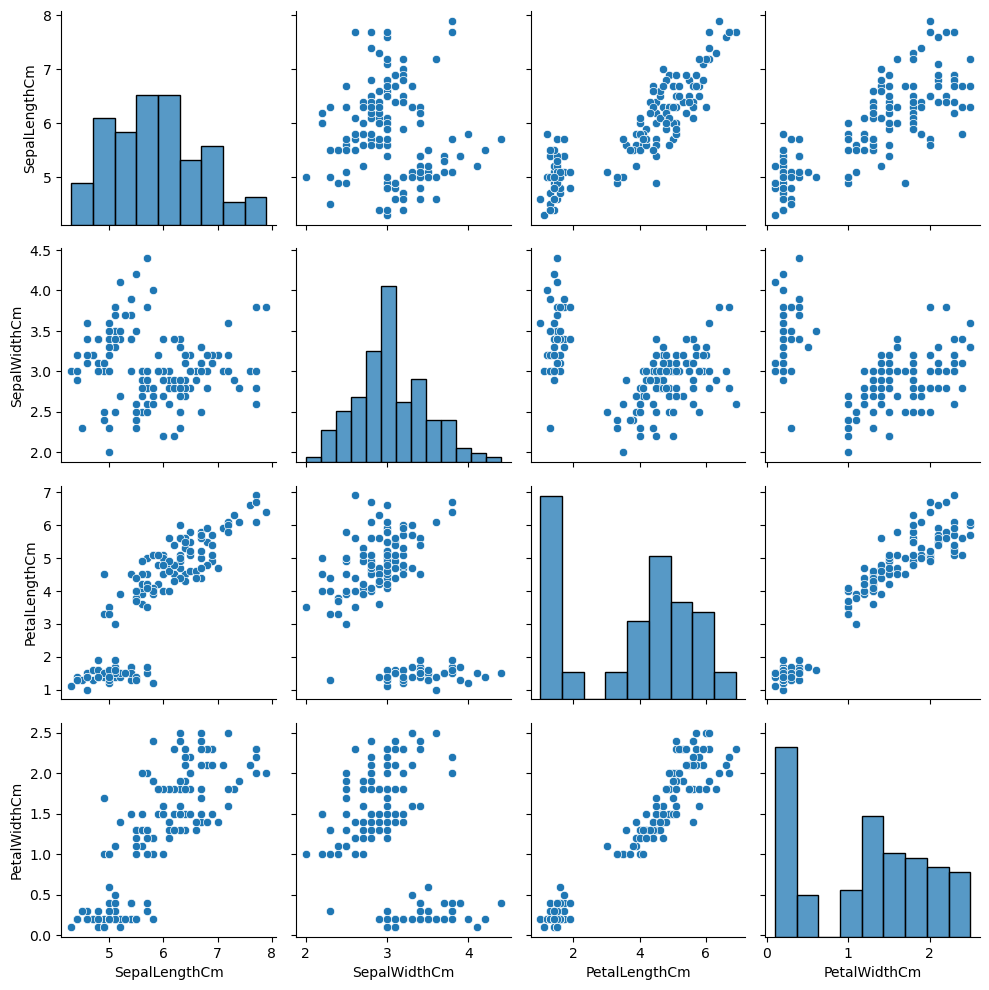

In [20]:
# Chart 7: Create a pairplot for the dataset
sns.pairplot(df)

# Adjust the layout to ensure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()

# 5. Feature Engineering and Data Pre-processing

### 1. Categorical Encoding

In [21]:
# Encode the categorical columns
# Create a labelEncoder object
le = LabelEncoder()

# Encode the 'Species' columns to convert the species names to numerical labels
df['Species'] = le.fit_transform(df['Species'])

# Check for the unique values in the 'Species' after encoding
unique = df['Species'].unique()

# Display the unique encoded values
print("Encoded unique values:", unique)

Encoded unique values: [0 1 2]


### 2. Data Scaling

In [22]:
# Define X and Y
# Separate the features (independent variables) from the target (dependent variable)
x = df.drop(columns = ['Species'], axis = 1)

# Extract the target (dependent variable)
y = df['Species']

### 3. Data Splitting

In [23]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [24]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Species
1    36
2    35
0    34
Name: count, dtype: int64

# 6. Model Implementation

In [25]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    """
    This function takes a model along with training and testing data (X_train, X_test, y_train, y_test). 
    It fits the model to the training data and makes predictions. It then performs the following:

    1. Prints the ROC-AUC scores for both training and testing sets.
    2. Plots the ROC-AUC curve.
    3. Prints the confusion matrix for both training and testing sets.
    4. Prints the classification report for both training and testing sets.
    5. Plots feature importance if the model supports it.
    6. Returns a list of scores: recall_train, recall_test, acc_train, acc_test, F1_train, F1_test.
    """
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize = (12,5))
    
    # Display Confusion Matrix
    # Train Confusion Matrix
    sns.heatmap(cm_train, cmap='Blues', fmt='.4g', annot = True, xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'], ax = ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    ax[0].set_title('Train Confusion Matrix')
    
    # Test Confusion Matrix
    sns.heatmap(cm_test, cmap='Blues', fmt='.4g', annot = True, xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'], ax = ax[1])
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    ax[1].set_title('Test Confusion Matrix')
    
    # Adjust the layout to ensure everything fits without overlap
    plt.tight_layout()

    # Display the plot
    plt.show()
    
    # Calculate the classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict = True)
    cr_test = classification_report(y_test, y_pred_test, output_dict = True)
    print("\nTrain Classification Report:")
    crt1 = pd.DataFrame(cr_train).T
    print(crt1.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    
    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
    
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test]
    return model_score

In [26]:
# Create a Score Dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'Accuracy Train', 'Accuracy Test', 'F1 Train', 'F1 Test'])

### Model 1: Logistic Regression

In [27]:
# Logistic Regression Implementation
lr_model = LogisticRegression(fit_intercept = True, max_iter = 10000)

#### 1. Explain the Ml Model used  its performance using Evaluation metric score chart

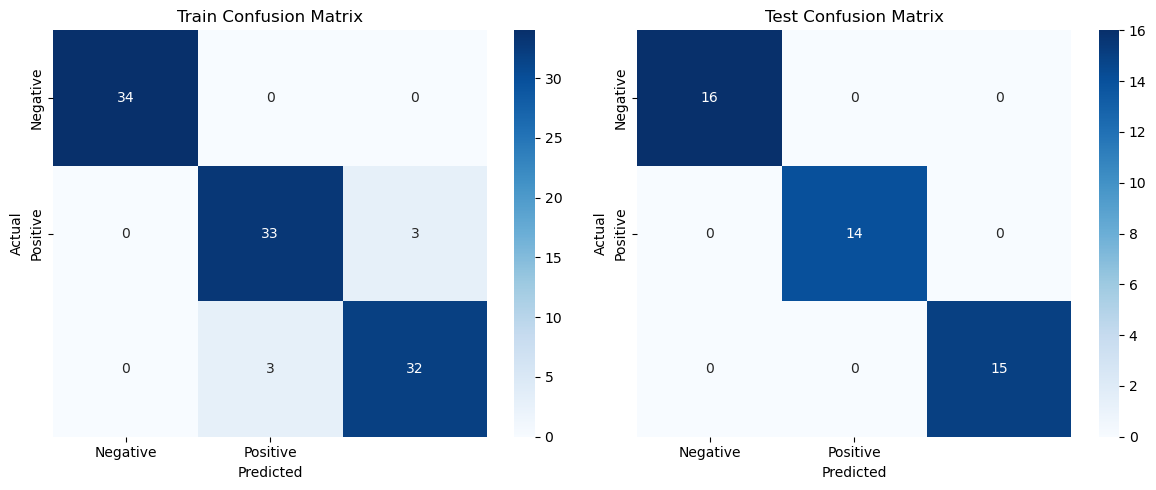


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.916667 | 0.916667 |   0.916667 |  36        |
| 2            |    0.914286 | 0.914286 |   0.914286 |  35        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.943651 | 0.943651 |   0.943651 | 105        |
| weighted avg |    0.942857 | 0.942857 |   0.942857 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        14 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

In [28]:
# Visualizing Evaluation Matric Score Chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [29]:
# Updated Evalution metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.942857
Precision Test,1.000000
Recall Train,0.942857
Recall Test,1.000000
Accuracy Train,0.942857
Accuracy Test,1.000000
F1 Train,0.942857
F1 Test,1.000000


#### 2. Cross-Validation and Hyperparameter Tuning

In [30]:
# Ml Model 2 - Implementation with hyperparameter optimization techniques
# Define the hyperparameter grid
grid = {'C' : [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
       'penalty' : ['l1', 'l2'],
       'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initialize the Model
logreg = LogisticRegression(fit_intercept = True, max_iter = 10000, random_state = 42)

# Repeated stratified kfold
rsfk = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 4, random_state = 42)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid1 = GridSearchCV(logreg, grid, cv = rsfk)
grid1.fit(x_train, y_train)

# Select the best hyperparameter found by GridSearchCV 
best_params = grid1.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [31]:
# Initiate Model With Best Parameters
lr_model2 = LogisticRegression(C = best_params['C'], 
                               penalty = best_params['penalty'], 
                               solver = best_params['solver'], 
                               max_iter = 10000, random_state = 42)

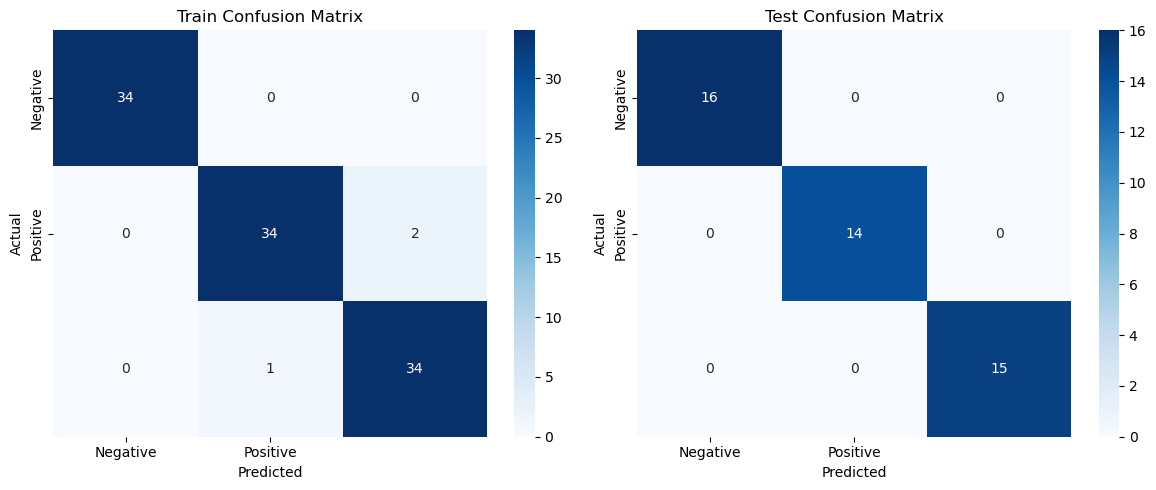


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.971429 | 0.944444 |   0.957746 |  36        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971958 | 0.971958 |   0.971831 | 105        |
| weighted avg |    0.971686 | 0.971429 |   0.971429 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        14 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

In [32]:
# Visualizing Evaluation Matric Score Chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [33]:
# Updated Evalution metric Score Chart
score['Logistic regression tuned'] = lr_score2

# Updated Evaluation metric score chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.942857,0.971686
Precision Test,1.000000,1.000000
Recall Train,0.942857,0.971429
Recall Test,1.000000,1.000000
Accuracy Train,0.942857,0.971429
Accuracy Test,1.000000,1.000000
F1 Train,0.942857,0.971429
F1 Test,1.000000,1.000000


It appears that hyperparameter tuning did improve the performance of the Logistic Regression model on both the train and the test set. The precision, recall, accuracy, and F1 scores for the train and the test set are increased. 

### Model 2 - Decision Tree

In [34]:
# Decision Tree Implementation
dt_model = DecisionTreeClassifier(random_state = 42)

#### 1. Explain the ML Model used and its performance using Evaluation Metric Score Chart

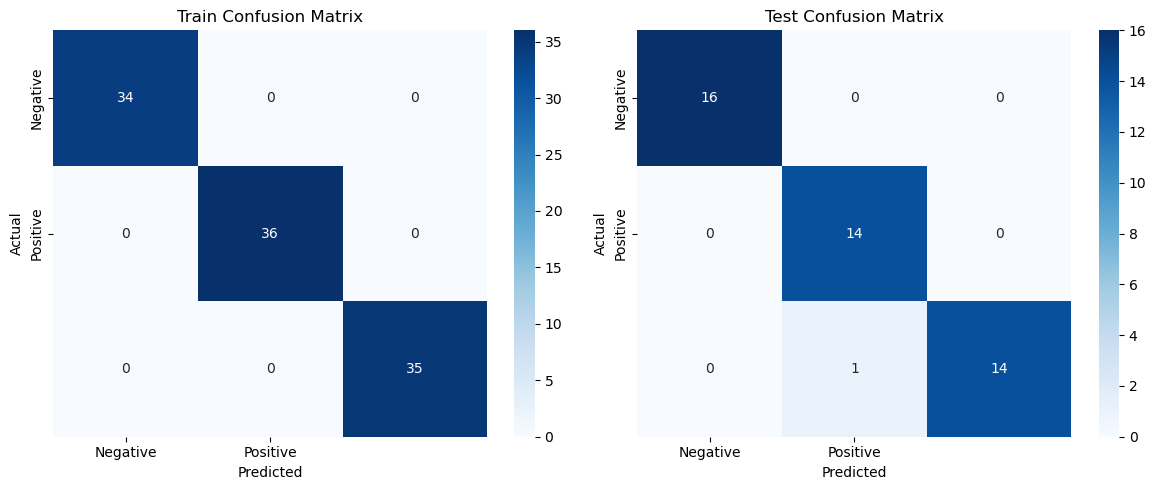


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.933333 | 1        |   0.965517 | 14        |
| 2            |    1        | 0.933333 |   0.965517 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [35]:
# Visualizing evaluation metric score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [36]:
# Updated evaluation metric score chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.942857,0.971686,1.000000
Precision Test,1.000000,1.000000,0.979259
Recall Train,0.942857,0.971429,1.000000
Recall Test,1.000000,1.000000,0.977778
Accuracy Train,0.942857,0.971429,1.000000
Accuracy Test,1.000000,1.000000,0.977778
F1 Train,0.942857,0.971429,1.000000
F1 Test,1.000000,1.000000,0.977778


#### 2. Cross-Validation and Hyperparameter Tuning

In [37]:
# Ml Model 2 - Implementation with hyperparameter optimization techniques
# Define the hyperparameter grid
grid = {'max_depth' : [3, 4, 5, 6, 7, 8],
       'min_samples_split' : np.arange(2, 8),
       'min_samples_leaf' : np.arange(10,20)}

# Initialize the Model
model = DecisionTreeClassifier()

# Repeated Stratified Kfold
rskf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)

# Initialize GridSearchCV 
grid_search = GridSearchCV(model, grid, cv = rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 6}


In [38]:
# Train a new model with Best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth = best_params['max_depth'],
                                  min_samples_leaf = best_params['min_samples_leaf'],
                                  min_samples_split = best_params['min_samples_split'],
                                  random_state = 42)

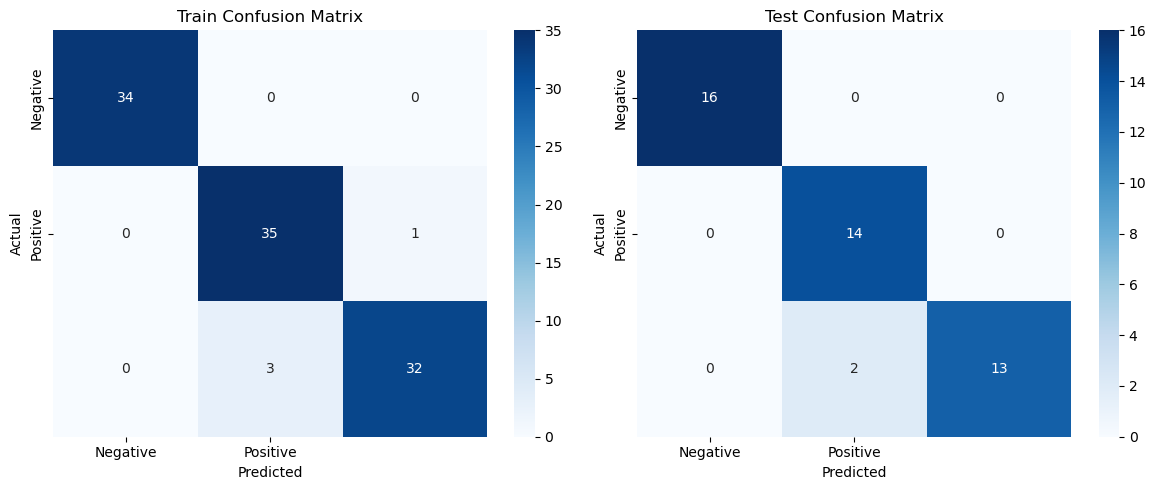


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.921053 | 0.972222 |   0.945946 |  36        |
| 2            |    0.969697 | 0.914286 |   0.941176 |  35        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963583 | 0.962169 |   0.962374 | 105        |
| weighted avg |    0.962831 | 0.961905 |   0.961859 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.875    | 1        |   0.933333 | 14        |
| 2            |    1        | 0.866667 |   0.928571 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [39]:
# Visualizing the evaluation metric score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [40]:
# Update the evaluation metric score chart
score['Decision Tree Tuned'] = dt2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned
Precision Train,0.942857,0.971686,1.000000,0.962831
Precision Test,1.000000,1.000000,0.979259,0.961111
Recall Train,0.942857,0.971429,1.000000,0.961905
Recall Test,1.000000,1.000000,0.977778,0.955556
Accuracy Train,0.942857,0.971429,1.000000,0.961905
Accuracy Test,1.000000,1.000000,0.977778,0.955556
F1 Train,0.942857,0.971429,1.000000,0.961859
F1 Test,1.000000,1.000000,0.977778,0.955450


It appears that hyperparameter tuning did not improved the performance of the Decision Tree Model on the test set. And the precision, recall, accuracy, and F1 score on the train set are less for the tuned Decision Tree Model compare to the untuned Decision Tree Model. It happened because of overfitting.

### ML Model 3 - Random Forest

In [41]:
# ML Model 3 Implementation
rf_model = RandomForestClassifier(random_state = 42)

#### 1. Explain the ML Model used and its performance Evaluation Metric Score Chart


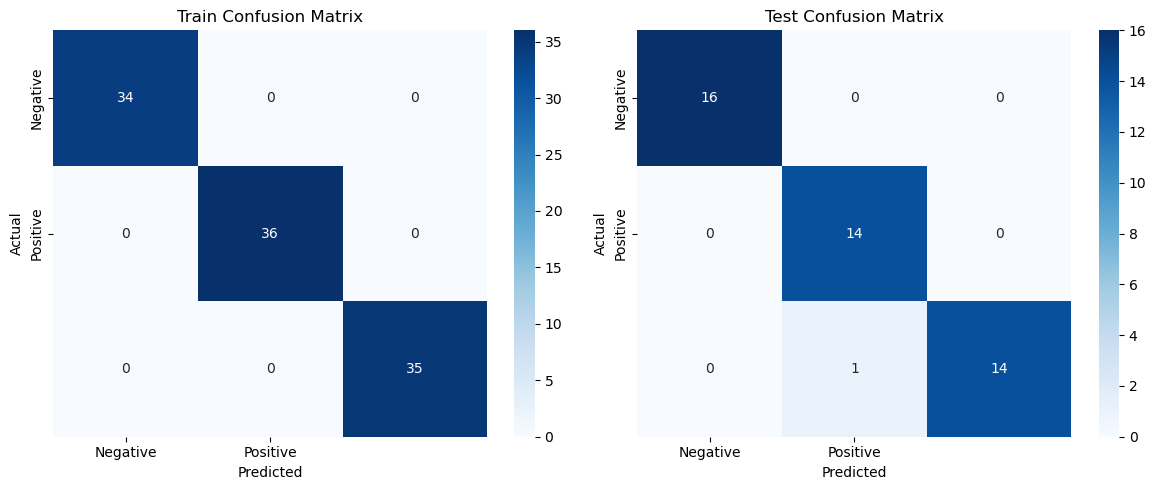


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.933333 | 1        |   0.965517 | 14        |
| 2            |    1        | 0.933333 |   0.965517 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [42]:
# Visualising the evaluation metric score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [43]:
# Update the evaluation metric score chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778


#### 2. Cross-Validation and Hyperparameter tuning

In [44]:
# ML Model 3 - Implementation with Hyperparameter Tuning
# Define the Hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
        'max_depth': [8, 9, 10, 11, 12, 13, 14, 15],
        'min_samples_split':[2, 3, 4, 5]}

# Initialize the Model
rf = RandomForestClassifier(random_state = 42)

# Repeated Stratified KFold
rskf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)

# Initialize RandomSearchCV
random_forest = RandomizedSearchCV(rf, grid, cv = rskf, n_iter = 10, n_jobs = -1)

# Fit the RandomizedSearchCV to the training data
random_forest.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_forest.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 10, 'min_samples_split': 4, 'max_depth': 8}


In [45]:
# Train a new ML Model with Best Hyperparameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                  min_samples_split = best_params['min_samples_split'],
                                  max_depth = best_params['max_depth'],
                                  random_state = 42)

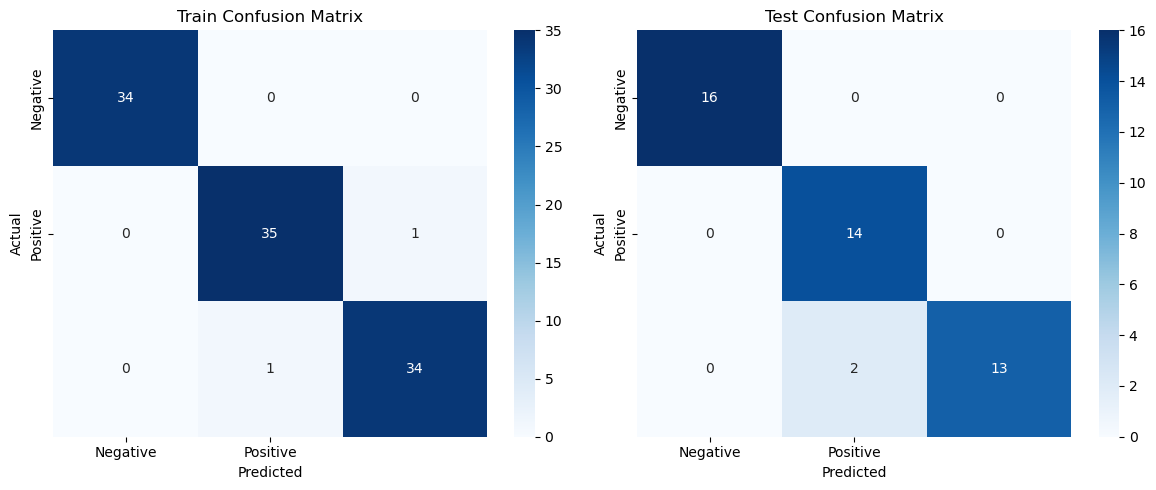


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.972222 | 0.972222 |   0.972222 |  36        |
| 2            |    0.971429 | 0.971429 |   0.971429 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981217 | 0.981217 |   0.981217 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.875    | 1        |   0.933333 | 14        |
| 2            |    1        | 0.866667 |   0.928571 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [46]:
# Visualizing the Evaluation Metric Score Chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [47]:
# Update the evaluation metric score
score['Random Forest Tuned'] = rf2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450


It appears that hyperparameter tuning did not improved the performance of the Random Forest Model on the test set. The precision, recall, accuracy, and F1 score on the train set are the same for both the tuned and untuned Random Forest Models.

### ML Model 4 - SVM (Support Vector Machine)

In [48]:
# ML Model 4 - Implementation
svm_model = SVC(kernel = 'linear', random_state = 42, probability = True)

#### 1. Explain the Model used and its performance using Evaluation Metric Score Chart

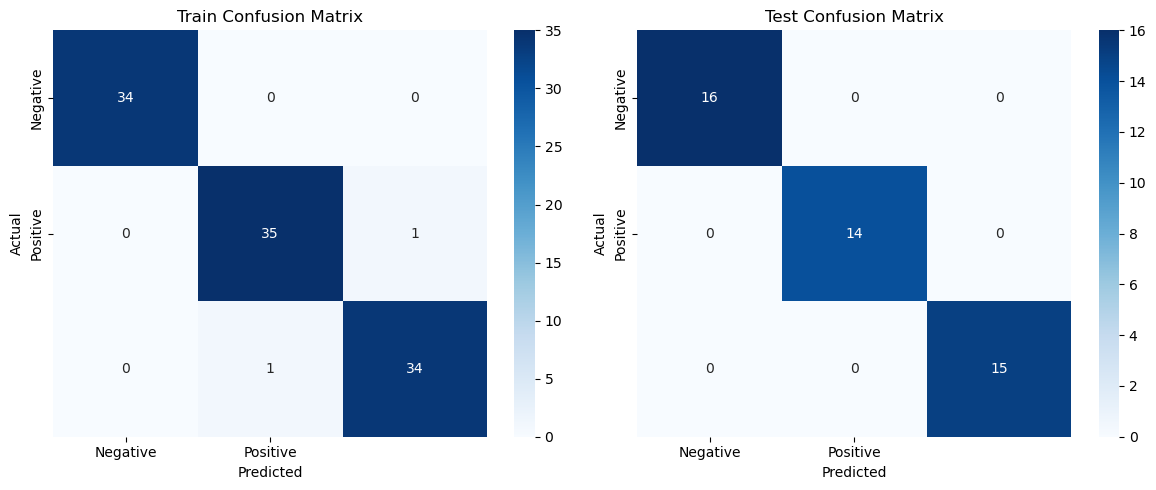


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.972222 | 0.972222 |   0.972222 |  36        |
| 2            |    0.971429 | 0.971429 |   0.971429 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981217 | 0.981217 |   0.981217 | 105        |
| weighted avg |    0.980952 | 0.980952 |   0.980952 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        14 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

In [49]:
# Visualizing evaluation metric score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [50]:
# Updated Evaluation Metric Score
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000


#### 2. Cross-Validation and Hyperparameter tuning

In [51]:
# ML Model 4 - Implementation with Hyperparameter Tuning
# Define the Hyperparameter grid
grid = {'C': np.arange(0.1, 10, 0.1),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree':np.arange(2, 6, 1)}

# Initialize the Model
svm = SVC(random_state = 42, probability = True)

# Repeated Stratified KFold
rskf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(svm, grid, cv = rskf, n_iter = 10, n_jobs = -1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 4, 'C': 2.7}


In [52]:
# Train a new Model with Best Hyperparameters
svm_model2 = SVC(C = best_params['C'],
                kernel = best_params['kernel'],
                degree = best_params['degree'],
                random_state = 42, probability = True)

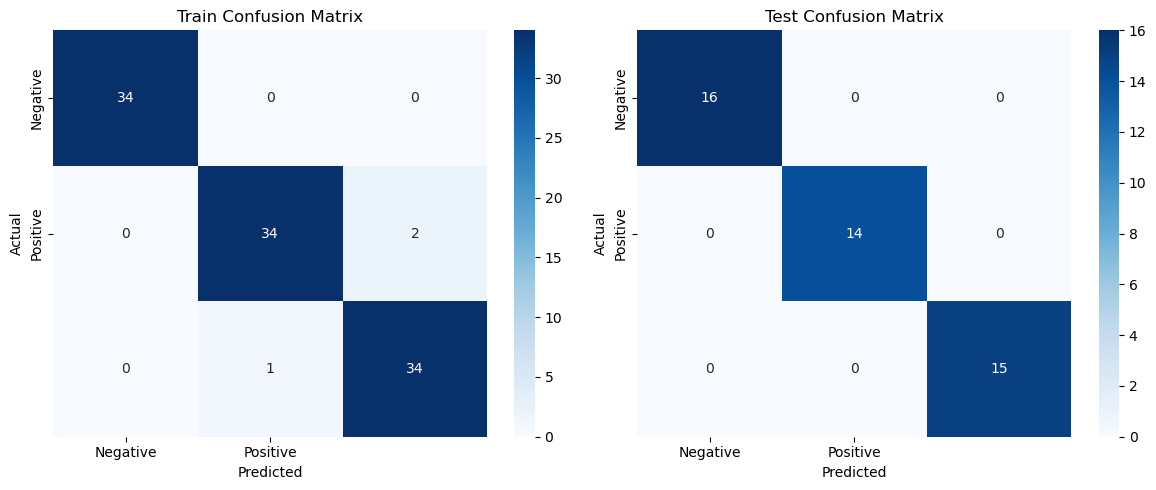


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.971429 | 0.944444 |   0.957746 |  36        |
| 2            |    0.944444 | 0.971429 |   0.957746 |  35        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.971958 | 0.971958 |   0.971831 | 105        |
| weighted avg |    0.971686 | 0.971429 |   0.971429 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        14 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

In [53]:
# Visualizung the evaluation metric score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [54]:
# Update the evaluation metric score chart
score['SVM Tuned'] = svm2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000


It appears that hyperparameter tuning did not improved the performance of the SVM Model on the train and test set. The precision, recall, accuracy, and F1 score on the train and test set are same for both untuned and tuned SVM Models

### ML Model 5 - Xtreme Gradient Boosting

In [55]:
# ML Model 5 - Implementation
xgb_model = xgb.XGBClassifier()

#### 1. Explain the Model used and its Performance using Evaluation Metric Score Chart

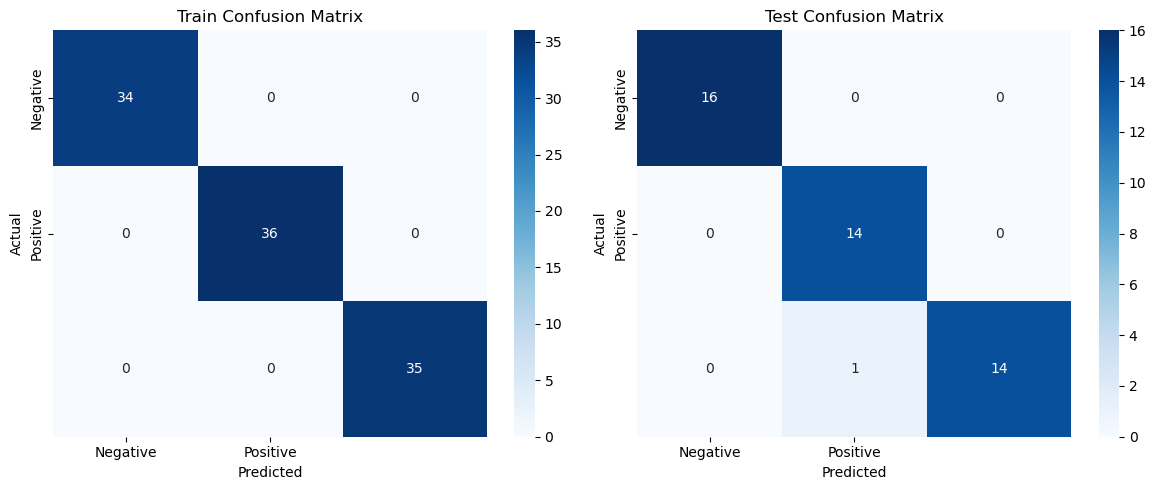


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        34 |
| 1            |           1 |        1 |          1 |        36 |
| 2            |           1 |        1 |          1 |        35 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.933333 | 1        |   0.965517 | 14        |
| 2            |    1        | 0.933333 |   0.965517 | 15        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [56]:
# Visualizing the evaluation metric score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [57]:
# Update Evaluation metric score chart
score['XGB'] = xgb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned,XGB
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686,1.000000
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000,0.979259
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429,1.000000
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000,0.977778


#### 2. Cross-Validation and Hyperparameter Tuning

In [58]:
# ML Model 5 - Implementation with hyperparameter tuning
# Define the hyperparameter grid
grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
       'max_depth': np.arange(3, 15, 1),
       'n_estimators': np.arange(100, 200, 10)}

# Initialize the Model
xgb2 = xgb.XGBClassifier(random_state = 42)

# Repeated Stratified KFold
rsfk = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, grid, n_iter = 10, cv = rsfk)

# Fit the RandomizedSearchCV to training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters are: ", best_params)

Best hyperparameters are:  {'n_estimators': 160, 'max_depth': 8, 'learning_rate': 0.01}


In [59]:
# Train a new model with best hyperparameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                              max_depth = best_params['max_depth'],
                              n_estimators = best_params['n_estimators'],
                              random_state = 42)

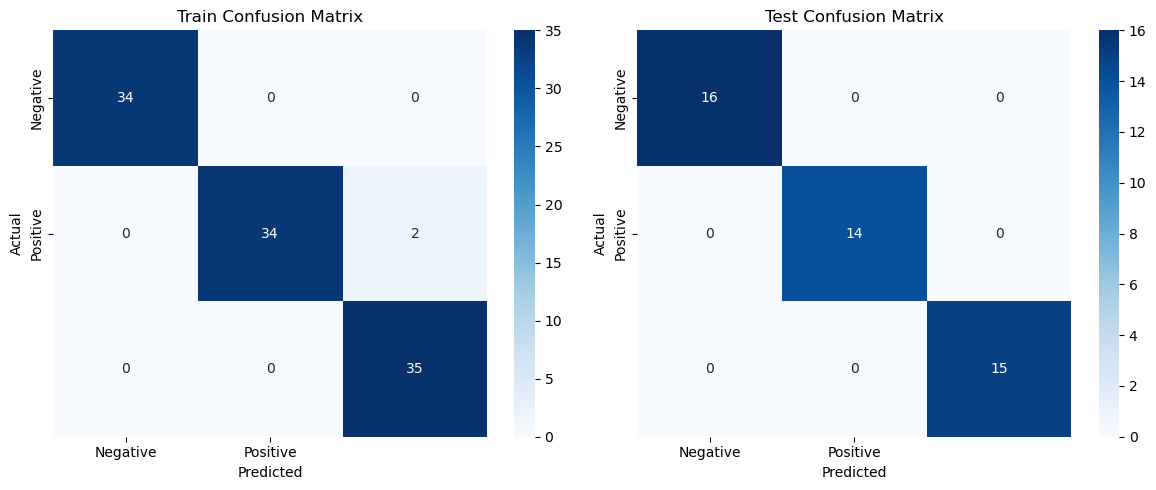


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.944444 |   0.971429 |  36        |
| 2            |    0.945946 | 1        |   0.972222 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981982 | 0.981481 |   0.981217 | 105        |
| weighted avg |    0.981982 | 0.980952 |   0.980945 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        14 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

In [60]:
# Visualizing the evaluation metric score chart
xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [61]:
# Update the evaluation metric score chart
score['XGB Tuned'] = xgb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned,XGB,XGB Tuned
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686,1.000000,0.981982
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000,0.979259,1.000000
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429,1.000000,0.980945
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000,0.977778,1.000000


It appears that hyperparameter tuning did not improved the performance of the XGB Model on the train and test set. The precision, recall, accuracy, and F1 score on the train and test set are same for both untuned and tuned XGB Models

### Model 6 - Naive Bayes

In [62]:
# Model 6 - Implementation
nb_model = GaussianNB()

#### 1. Explain the model used and its performance using Evaluation Metric Score Chart

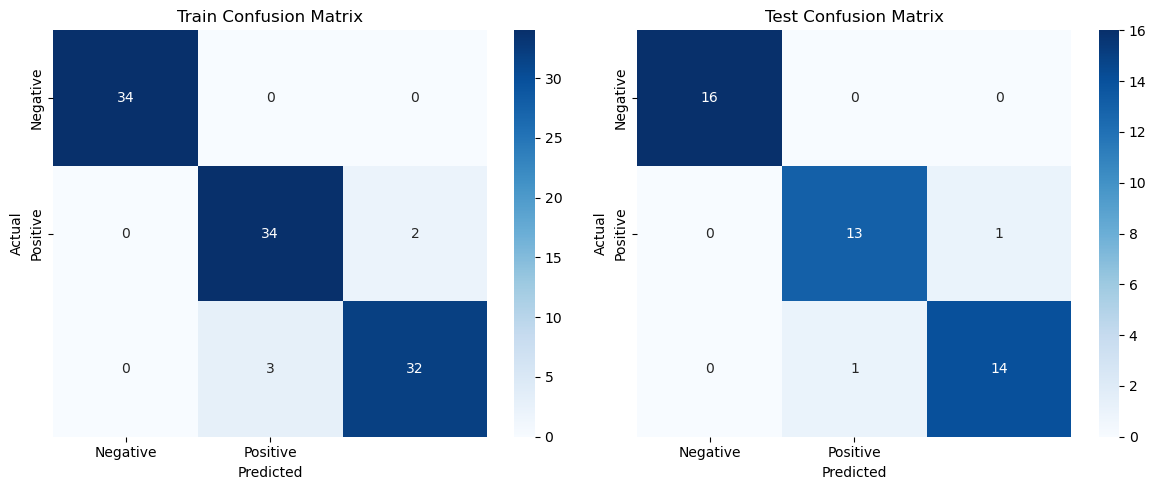


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.918919 | 0.944444 |   0.931507 |  36        |
| 2            |    0.941176 | 0.914286 |   0.927536 |  35        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.953365 | 0.95291  |   0.953014 | 105        |
| weighted avg |    0.952593 | 0.952381 |   0.952362 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.928571 | 0.928571 |   0.928571 | 14        |
| 2            |    0.933333 | 0.933333 |   0.933333 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [63]:
# Visualizing the Evaluation Metric Score Chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [64]:
# Update the Evaluation Metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned,XGB,XGB Tuned,Naive Bayes
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686,1.000000,0.981982,0.952593
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000,0.979259,1.000000,0.955556
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429,1.000000,0.980945,0.952362
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000,0.977778,1.000000,0.955556


#### 2. Cross-Validation and Hyperparameter Tuning

In [65]:
# ML model 6 - Implementation with hyperparameter optimization
# Define the Hyperparameter grid
grid = {'var_smoothing': np.logspace(0, -9, num = 100)}

# Initialize the model
nb = GaussianNB()

# Repeated Stratified KFold
rskf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)

# Initialize GridSearchCV 
GridSearch = GridSearchCV(nb, grid, cv = rskf, n_jobs = -1)

# Fit the GridSearchCV to the training data
GridSearch.fit(x_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'var_smoothing': 0.0012328467394420659}


In [66]:
# Train a new model with best hyperparameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])

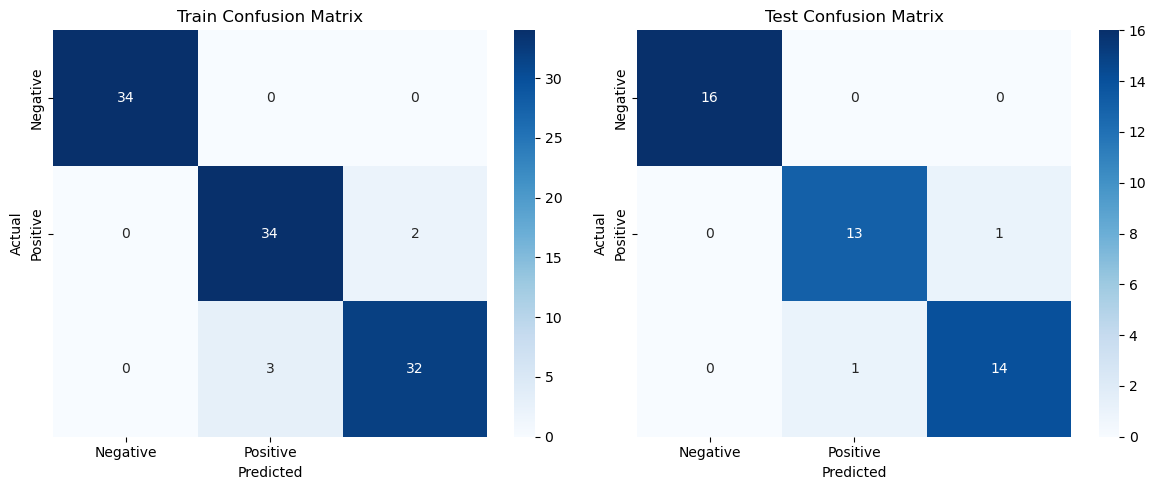


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.918919 | 0.944444 |   0.931507 |  36        |
| 2            |    0.941176 | 0.914286 |   0.927536 |  35        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.953365 | 0.95291  |   0.953014 | 105        |
| weighted avg |    0.952593 | 0.952381 |   0.952362 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.928571 | 0.928571 |   0.928571 | 14        |
| 2            |    0.933333 | 0.933333 |   0.933333 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [67]:
# Visualizing the evaluation metric score chart
nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [68]:
# Update the evaluation metric score chart
score['Naive Bayes Tuned'] = nb2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned,XGB,XGB Tuned,Naive Bayes,Naive Bayes Tuned
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686,1.000000,0.981982,0.952593,0.952593
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000,0.979259,1.000000,0.955556,0.955556
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381,0.952381
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381,0.952381
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429,1.000000,0.980945,0.952362,0.952362
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556


It appears that hyperparameter tuning did not improved the performance of the Naive Bayes Model on the train and test set. The precision, recall, accuracy, and F1 score on the train and test set are same in both tuned and untuned Naive Bayes Models.

### Model 7 - Neural network

In [69]:
# Model 7 - Implementation 
nn_model = MLPClassifier(random_state = 42)


#### 1. Explain the model used and its performance using Evaluate Metric Score Chart

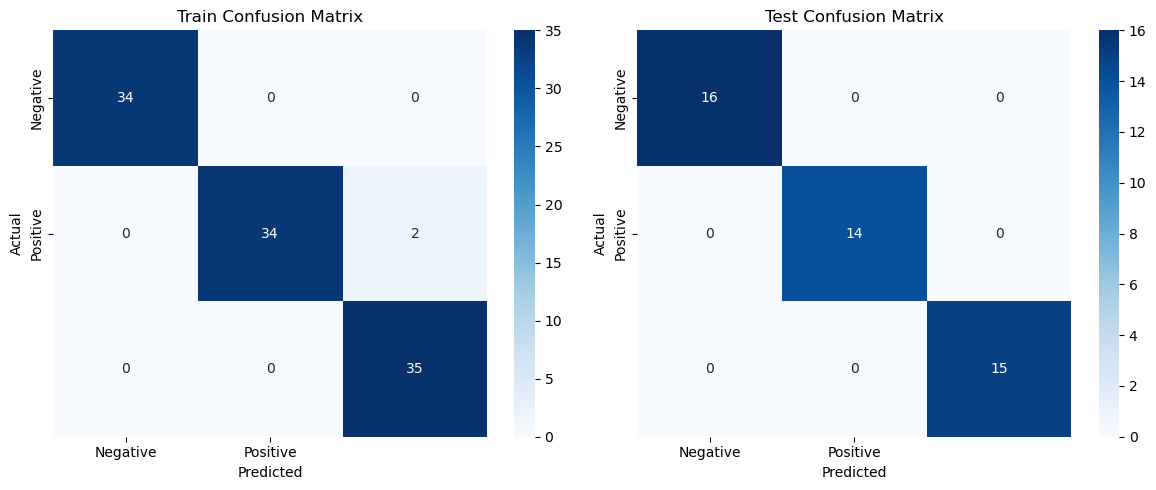


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    1        | 0.944444 |   0.971429 |  36        |
| 2            |    0.945946 | 1        |   0.972222 |  35        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.981982 | 0.981481 |   0.981217 | 105        |
| weighted avg |    0.981982 | 0.980952 |   0.980945 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        16 |
| 1            |           1 |        1 |          1 |        14 |
| 2            |           1 |        1 |          1 |        15 |
| accuracy     |           1 |        1 |          1 |        

In [70]:
# Visualizing the evaluation metric score chart
nn_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [71]:
# Update the evaluation metric score chart
score['Neural Network'] = nn_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned,XGB,XGB Tuned,Naive Bayes,Naive Bayes Tuned,Neural Network
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686,1.000000,0.981982,0.952593,0.952593,0.981982
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000,0.979259,1.000000,0.955556,0.955556,1.000000
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381,0.952381,0.980952
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556,1.000000
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381,0.952381,0.980952
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556,1.000000
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429,1.000000,0.980945,0.952362,0.952362,0.980945
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556,1.000000


#### 2. Cross-Validation and Hyperparameter Tuning


In [72]:
# ML model 7 - Implementation with Hyperparameter Optimization
# Define hyperparameter grid
grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
       'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the Model
nn = MLPClassifier(random_state = 42)

# Repeated Stratified KFold
rskf = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3, random_state = 42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(nn, grid, cv = rskf, random_state = 42, n_jobs = -1)

# Fit the RandomizedSearchCV to the Training set
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'hidden_layer_sizes': 80, 'alpha': 0.0079}


In [73]:
# Train a new model with best hyperparameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'], alpha = best_params['alpha'], random_state = 42)

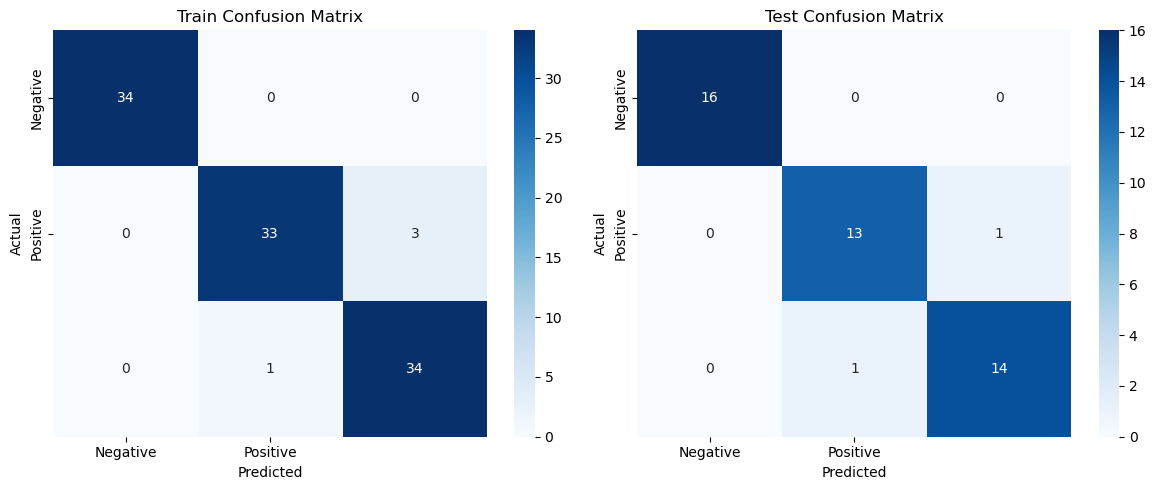


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  34        |
| 1            |    0.970588 | 0.916667 |   0.942857 |  36        |
| 2            |    0.918919 | 0.971429 |   0.944444 |  35        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963169 | 0.962698 |   0.962434 | 105        |
| weighted avg |    0.962889 | 0.961905 |   0.96189  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 16        |
| 1            |    0.928571 | 0.928571 |   0.928571 | 14        |
| 2            |    0.933333 | 0.933333 |   0.933333 | 15        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [74]:
# Visualizing the evaluation metric score chart
nn2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [75]:
# Update the evaluation metric score chart
score['Neural Network Tuned'] = nn2_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,SVM,SVM Tuned,XGB,XGB Tuned,Naive Bayes,Naive Bayes Tuned,Neural Network,Neural Network Tuned
Precision Train,0.942857,0.971686,1.000000,0.962831,1.000000,0.980952,0.980952,0.971686,1.000000,0.981982,0.952593,0.952593,0.981982,0.962889
Precision Test,1.000000,1.000000,0.979259,0.961111,0.979259,0.961111,1.000000,1.000000,0.979259,1.000000,0.955556,0.955556,1.000000,0.955556
Recall Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381,0.952381,0.980952,0.961905
Recall Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556,1.000000,0.955556
Accuracy Train,0.942857,0.971429,1.000000,0.961905,1.000000,0.980952,0.980952,0.971429,1.000000,0.980952,0.952381,0.952381,0.980952,0.961905
Accuracy Test,1.000000,1.000000,0.977778,0.955556,0.977778,0.955556,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556,1.000000,0.955556
F1 Train,0.942857,0.971429,1.000000,0.961859,1.000000,0.980952,0.980952,0.971429,1.000000,0.980945,0.952362,0.952362,0.980945,0.961890
F1 Test,1.000000,1.000000,0.977778,0.955450,0.977778,0.955450,1.000000,1.000000,0.977778,1.000000,0.955556,0.955556,1.000000,0.955556


It appears that hyperparameter tuning did not improved the performance of the Neural Network Model on the test set. The precision, recall, accuracy, and F1 score on the test set for the tuned Neural Network is less compared to the untuned Neural Network Model.

## Selection of the Best Model

In [77]:
# Removing the overfitted models which have precision, recall, accuracy, and F1 scores for train as 1
# Taking transpose of the score datadrame to create a new difference column
score_t = score.transpose()
remove_models = score_t[score_t['Recall Train'] > 0.98].index
remove_models

adj = score_t.drop(remove_models)
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 Train,F1 Test
Logistic regression,0.942857,1.000000,0.942857,1.000000,0.942857,1.000000,0.942857,1.000000
Logistic regression tuned,0.971686,1.000000,0.971429,1.000000,0.971429,1.000000,0.971429,1.000000
Decision Tree Tuned,0.962831,0.961111,0.961905,0.955556,0.961905,0.955556,0.961859,0.955450
SVM Tuned,0.971686,1.000000,0.971429,1.000000,0.971429,1.000000,0.971429,1.000000
Naive Bayes,0.952593,0.955556,0.952381,0.955556,0.952381,0.955556,0.952362,0.955556
Naive Bayes Tuned,0.952593,0.955556,0.952381,0.955556,0.952381,0.955556,0.952362,0.955556
Neural Network Tuned,0.962889,0.955556,0.961905,0.955556,0.961905,0.955556,0.961890,0.955556


In [81]:
def select_best_model(df, metrics):
    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [83]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1']

best_models = select_best_model(adj, metrics)
print("The best Models are: ")
for metric, best_model in best_models.items():
    print(f"{metric} : {best_model} - {adj[metric + ' Test'][best_model].round(4)}")

The best Models are: 
Precision : Logistic regression - 1.0
Recall : Logistic regression - 1.0
Accuracy : Logistic regression - 1.0
F1 : Logistic regression - 1.0


In [87]:
# Take Accuracy as the primary evaluation metric
score_sample = score.transpose()
remove_overfitting_models = score_sample[score_sample['Accuracy Train'] < 1.0].index
remove_overfitting_models

new_score = score_sample.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train', 'Precision Test', 'Recall Train', 'Recall Test', 'F1 Train', 'F1 Test'], axis = 1)

new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model   |   Accuracy Train |   Accuracy Test |
|:-----------------------|-----------------:|----------------:|
| Decision Tree          |                1 |        0.977778 |
| Random Forest          |                1 |        0.977778 |
| XGB                    |                1 |        0.977778 |
